In [1]:
#decision tree = you can perform both regrassion as well as classification using decision tree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
a=pd.read_csv('C:\\Users\\pc\\Desktop\pokemon.csv')
a.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [100]:
a.rename(columns=('Type 1':'Primary_Type','Type 2':'secondary_Type'),inplace=True)                       #rename the column name

SyntaxError: invalid syntax (<ipython-input-100-fe3066f499f9>, line 1)

In [3]:
a['Type 1']=="Grass"                                                                                #extract grass from type 1

0       True
1       True
2       True
3       True
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Type 1, Length: 800, dtype: bool

In [4]:
grass_pokemon=a[a['Type 1']=="Grass"]
grass_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False


In [5]:
water_pokemon=a[a['Type 1']=="Water"]
water_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
59,54,Psyduck,Water,NaN,320,50,52,48,65,50,55,1,False


In [6]:
fire_pokemon=a[a['Type 1']=="Fire"]
fire_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [7]:
a.shape

(800, 13)

In [8]:
grass_pokemon.shape

(70, 13)

In [9]:
grass_pokemon.shape

(70, 13)

In [10]:
water_pokemon.shape

(112, 13)

In [11]:
fire_pokemon.shape

(52, 13)

In [12]:
grass_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False


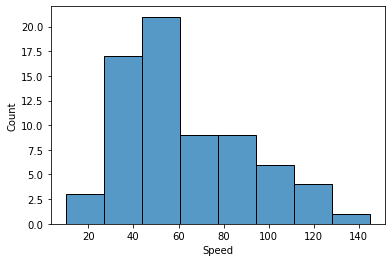

In [13]:
sns.histplot(grass_pokemon['Speed'])
plt.show()

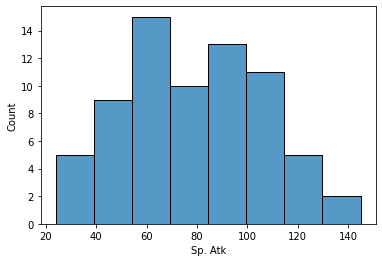

In [14]:
sns.histplot(grass_pokemon['Sp. Atk'])
plt.show()

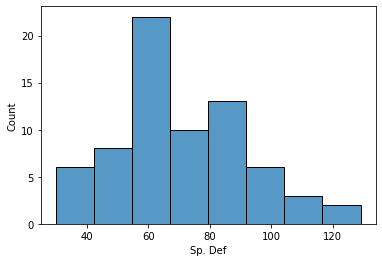

In [15]:
sns.histplot(grass_pokemon['Sp. Def'])
plt.show()

In [16]:
grass_pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,344.871429,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143
std,200.264385,106.650626,19.516564,25.380520,24.485192,27.244864,21.446645,28.506456,1.579173
min,1.000000,180.000000,30.000000,27.000000,30.000000,24.000000,30.000000,10.000000,1.000000
25%,187.250000,318.500000,51.250000,55.000000,50.000000,57.000000,55.000000,40.000000,2.000000
50%,372.000000,430.000000,65.500000,70.000000,66.000000,75.000000,66.000000,58.500000,3.500000
75%,496.750000,497.000000,75.000000,93.500000,84.500000,99.500000,85.000000,80.000000,5.000000
max,673.000000,630.000000,123.000000,132.000000,131.000000,145.000000,129.000000,145.000000,6.000000


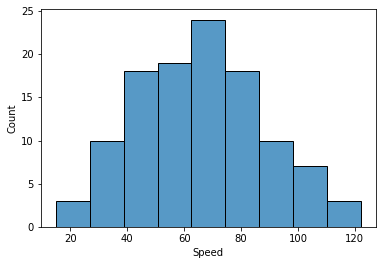

In [17]:
sns.histplot(water_pokemon['Speed'])
plt.show()

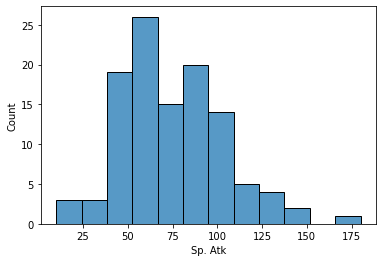

In [18]:
sns.histplot(water_pokemon['Sp. Atk'])
plt.show()

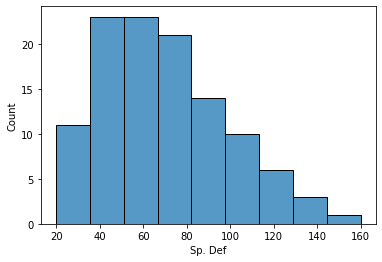

In [23]:
sns.histplot(water_pokemon['Sp. Def'])
plt.show()

In [24]:
water_pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,303.089286,430.455357,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143
std,188.440807,113.188266,27.487026,28.377192,27.773809,29.030128,28.460493,23.019353,1.558800
min,7.000000,200.000000,20.000000,10.000000,20.000000,10.000000,20.000000,15.000000,1.000000
25%,130.000000,328.750000,52.250000,53.000000,54.500000,55.000000,50.000000,50.000000,1.000000
50%,275.000000,455.000000,70.000000,72.000000,70.000000,70.000000,65.000000,65.000000,3.000000
75%,456.250000,502.250000,90.250000,92.000000,88.500000,90.500000,89.250000,82.000000,4.000000
max,693.000000,770.000000,170.000000,155.000000,180.000000,180.000000,160.000000,122.000000,6.000000


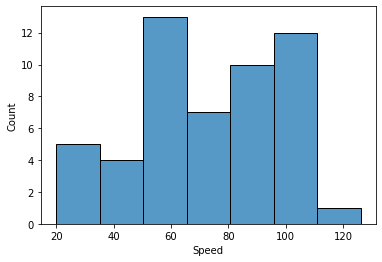

In [25]:
sns.histplot(fire_pokemon['Speed'])
plt.show()

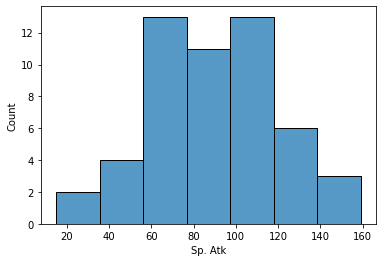

In [26]:
sns.histplot(fire_pokemon['Sp. Atk'])
plt.show()

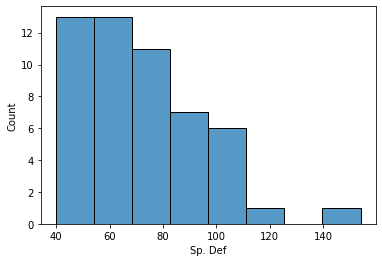

In [28]:
sns.histplot(fire_pokemon['Sp. Def'])
plt.show()

In [30]:
fire_pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538
std,226.262840,109.760496,19.404123,28.769275,23.658200,30.042121,22.619908,25.245783,1.850665
min,4.000000,250.000000,38.000000,30.000000,37.000000,15.000000,40.000000,20.000000,1.000000
25%,143.500000,368.000000,58.000000,62.250000,51.000000,70.000000,54.750000,60.000000,1.000000
50%,289.500000,482.000000,70.000000,84.500000,64.000000,85.000000,67.500000,78.500000,3.000000
75%,513.250000,534.000000,80.000000,101.000000,78.000000,109.000000,85.000000,96.250000,5.000000
max,721.000000,680.000000,115.000000,160.000000,140.000000,159.000000,154.000000,126.000000,6.000000


In [35]:
a.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [37]:
a['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [40]:
65/800

0.08125

In [43]:
x=a[['Speed']]

In [45]:
y=a[['Legendary']]

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtc = DecisionTreeClassifier()

In [56]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred = dtc.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_test,y_pred)

array([[217,   1],
       [ 22,   0]], dtype=int64)

In [65]:
(217+0)/(217+1+0+22)

0.9041666666666667

In [66]:
#decision tree with ligrassion

In [69]:
a.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [71]:
x=a[['Defense']]

In [73]:
y = a[['Attack']]

In [77]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
dtr = DecisionTreeRegressor()

In [88]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [90]:
y_pred = dtc.predict(x_test)

In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
mean_squared_error(y_test,y_pred)

7026.366666666667